In [20]:
import numpy as np
from io import StringIO
import io 

In [24]:
with io.open("behav.csv")as f1: 
    data=f1.read()
    f1.close()


In [25]:
data

'5,5,5,2,2,2,3,3,3,4,4,4,4,4,4,4,4,1,3,3,3,3,3,5,2,2,5,3,3,3,3,3,3,3,5,5,5,2,2,4,4,2,2,3,3,3,3,3,3,3,5,5,5,4,4,4,4,4,2,2,5,1,5,5,3,3,3,2,2,3,3,3,4,4,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,1,1,1,1,3,1,1,3,3,3,3,3,1,2,2,2,1,4,2,2,2,2,4,4,4,4,4,4,2,2,2,2,2,2,2,1,4,4,4,4,4,4,4,1,3,3,4,4,4,4,5,5,3,3,4,4,4,4,1,5,1,3,3,3,1,2,2,2,2,4,2,2,2,2,2,2,3,2,2,5,5,1,2,2,5,5,1,2,2,5,5,1,2,2,2,2,2,2,2,2,3,3,3,5,1,4,4,4,4,2,2,2,2,2,2,3,3,3,3,1,5,5,5,5,5,4,4,4,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,2,2,2,2,2,2,2,2,4,4,4,4,4,4,2,2,2,1,2,2,2,2,2,2,2,5,1,4,4,4,4,4,3,3,3,1,5,5,5,5,1,4,4,4,2,2,5,5,4,4,4,4,2,2,2,3,3,3,3,3,3,3,2,2,2,2,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,1,4,4,4,4,4,4,1,2,2,2,2,1,1,2,2,5,5,1,3,1,3,3,3,3,3,3,4,4,4,4,2,2,2,2,2,3,1,1,1,5,5,5,2,2,5,4,4,4,3,3,3,3,2,2,4,4,4,4,4,4,4,4,2,2,3,3,3,3,3,1,1,3,3,3,2,2,2,5,5,5,5,5,2,2,3,3,3,3,3,4,4,4,3,2,2,2,1,3,1,1,3,4,4,4,4,4,4,4,4,4,2,2,3,3,3,3,3,3,3,3,5,5,5,1,1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,2,2,2,1,4,4,4,4,4,4,1,3,3,3,3,3,3,4,4,4,4,4,2,2,2,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4

In [28]:
a=np.genfromtxt(StringIO(data),delimiter=",")

In [29]:
a

array([5., 5., 5., ..., 2., 2., 2.])

In [34]:
np.save("posttalk", a,)

In [35]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns

In [36]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [37]:
infiles

('C:/Users/Yttri-Lab/Desktop/DURATIONPRACTICE/posttalk.npy',)

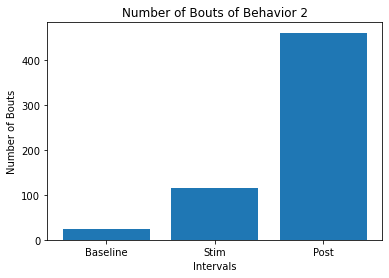

NameError: name 'num_intervals' is not defined

In [38]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

# Load the np file containing predictions
predictions = np.load(infiles[0])

# Define the behavior of interest
behavior_of_interest = 2

# Calculate the bouts of the behavior of interest
bouts = []
current_bout = []
for i, value in enumerate(predictions):
    if value == behavior_of_interest:
        current_bout.append(i)
    elif current_bout:
        bouts.append(current_bout)
        current_bout = []
if current_bout:
    bouts.append(current_bout)

# Calculate the number of bouts
num_bouts = len(bouts)

# Separate bouts into 2.5 minute intervals (baseline, stim, post)
interval_duration = 2.5 * 60  # Convert 2.5 minutes to seconds
baseline_duration = 5 * 60  # 5 minutes
stim_duration = 30 * 60  # 30 minutes
post_duration = 30 * 60  # 30 minutes

baseline_bouts = []
stim_bouts = []
post_bouts = []

for bout in bouts:
    bout_start = bout[0]
    bout_end = bout[-1]
    if bout_start < baseline_duration:
        baseline_bouts.append(bout)
    elif baseline_duration <= bout_start < baseline_duration + stim_duration:
        stim_bouts.append(bout)
    else:
        post_bouts.append(bout)

# Calculate the number of bouts in each interval
num_baseline_bouts = len(baseline_bouts)
num_stim_bouts = len(stim_bouts)
num_post_bouts = len(post_bouts)

# Create a bar plot to display the number of bouts in each interval
labels = ['Baseline', 'Stim', 'Post']
counts = [num_baseline_bouts, num_stim_bouts, num_post_bouts]

plt.bar(labels, counts)
plt.xlabel('Intervals')
plt.ylabel('Number of Bouts')
plt.title('Number of Bouts of Behavior {}'.format(behavior_of_interest))
plt.show()

# Calculate the duration and count for each time interval
duration_intervals = []
count_intervals = []
for i in range(num_intervals):
    start_idx = i * interval_length
    end_idx = (i + 1) * interval_length
    
    interval_predictions = predictions[start_idx:end_idx]
    
    duration_interval = np.sum(interval_predictions == behavior_of_interest)
    count_interval = np.sum(np.diff(np.where(interval_predictions == behavior_of_interest)[0]) > 1)
    
    duration_intervals.append(duration_interval)
    count_intervals.append(count_interval)

# Create separate plots for duration and count
plt.figure(figsize=(12, 6))

# Plot for duration
plt.subplot(1, 2, 1)
plt.bar(range(num_intervals), duration_intervals)
plt.title("Duration of Behavior {}".format(behavior_of_interest))
plt.xlabel("Time Interval")
plt.ylabel("Duration")
plt.xticks(range(num_intervals), ["Interval {}".format(i+1) for i in range(num_intervals)], rotation=45)

# Plot for count
plt.subplot(1, 2, 2)
plt.bar(range(num_intervals), count_intervals)
plt.title("Count of Behavior {}".format(behavior_of_interest))
plt.xlabel("Time Interval")
plt.ylabel("Count")
plt.xticks(range(num_intervals), ["Interval {}".format(i+1) for i in range(num_intervals)], rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Duration and Count of Behavior 6 for Different Time Periods:
First 5 minutes - Duration: 0 Count: 0
5 minutes to 30 minutes - Duration: 0 Count: 0
30 minutes to 65 minutes - Duration: 0 Count: 0


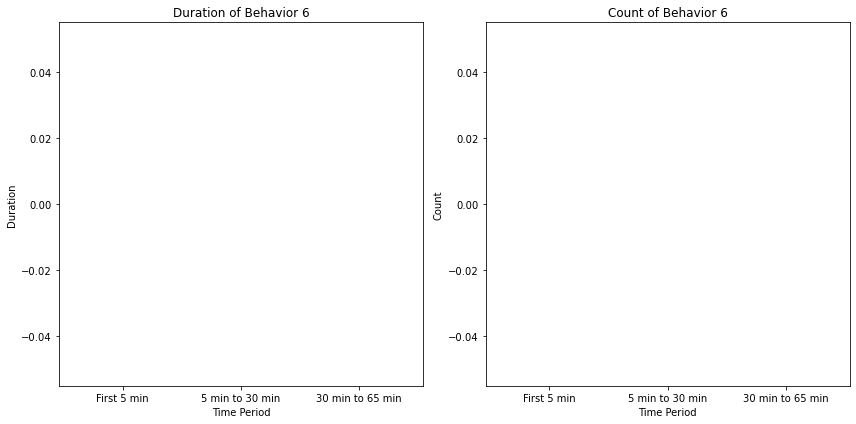

In [48]:
# Load the np file containing predictions
predictions = np.load(infiles[0])

# Define the behavior of interest
behavior_of_interest = 6

# Define the time intervals in tenths of a second
first_5_min_end = 3000
five_to_30_min_start = 3000
five_to_30_min_end = 18000
thirty_to_65_min_start = 18000
thirty_to_65_min_end = 39000

# Filter predictions for the first 5 minutes
first_5_min_predictions = predictions[:first_5_min_end]

# Filter predictions for the time frame from 5 minutes to 30 minutes
five_to_30_min_predictions = predictions[five_to_30_min_start:five_to_30_min_end]

# Filter predictions for the time frame from 30 minutes to 65 minutes
thirty_to_65_min_predictions = predictions[thirty_to_65_min_start:thirty_to_65_min_end]

# Calculate the duration and count of the behavior of interest for each time period
duration_first_5_min = np.sum(first_5_min_predictions == behavior_of_interest)
count_first_5_min = np.sum(np.diff(np.where(first_5_min_predictions == behavior_of_interest)[0]) > 1)

duration_five_to_30_min = np.sum(five_to_30_min_predictions == behavior_of_interest)
count_five_to_30_min = np.sum(np.diff(np.where(five_to_30_min_predictions == behavior_of_interest)[0]) > 1)

duration_thirty_to_65_min = np.sum(thirty_to_65_min_predictions == behavior_of_interest)
count_thirty_to_65_min = np.sum(np.diff(np.where(thirty_to_65_min_predictions == behavior_of_interest)[0]) > 1)

# Print the duration and count for each time period
print("Duration and Count of Behavior", behavior_of_interest, "for Different Time Periods:")
print("First 5 minutes - Duration:", duration_first_5_min, "Count:", count_first_5_min)
print("5 minutes to 30 minutes - Duration:", duration_five_to_30_min, "Count:", count_five_to_30_min)
print("30 minutes to 65 minutes - Duration:", duration_thirty_to_65_min, "Count:", count_thirty_to_65_min)

# Create separate plots for duration and count
plt.figure(figsize=(12, 6))

# Plot for duration
plt.subplot(1, 2, 1)
plt.bar(["First 5 min", "5 min to 30 min", "30 min to 65 min"], [duration_first_5_min, duration_five_to_30_min, duration_thirty_to_65_min])
plt.title("Duration of Behavior {}".format(behavior_of_interest))
plt.xlabel("Time Period")
plt.ylabel("Duration")

# Plot for count
plt.subplot(1, 2, 2)
plt.bar(["First 5 min", "5 min to 30 min", "30 min to 65 min"], [count_first_5_min, count_five_to_30_min, count_thirty_to_65_min])
plt.title("Count of Behavior {}".format(behavior_of_interest))
plt.xlabel("Time Period")
plt.ylabel("Count")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()